# Figure 4: Infer activities

In [1]:
from os import path
import seaborn as sns
import matplotlib.pyplot as plt

from pymodulon.compare import compare_ica
from pymodulon.io import load_json_model
from pymodulon.plotting import *
from pymodulon.example_data import load_bsub_data, load_ecoli_data

## Set plotting style

In [2]:
sns.set_style('ticks')
plt.style.use('custom.mplstyle')

# To save plots, set save_plot=True
save_plot=False

## Load data

In [3]:
figure_dir = 'raw_figures'
data_dir = path.join('..','data','processed_data')

In [4]:
data_file = path.join(data_dir,'bsu.json.gz')
ica_data = load_json_model(data_file)

## Load new data

In [214]:
new_data = pd.read_csv(path.join('..','data','raw_data','GSE141305','log_tpm.csv'),index_col=0)
multiqc = pd.read_csv(path.join('..','data','raw_data','GSE141305','multiqc_stats.tsv'),index_col=0,sep='\t')
metadata = pd.read_csv(path.join('..','data','raw_data','GSE141305','GSE141305_metadata.tsv'),index_col=0,sep='\t')


drop_samples = multiqc[multiqc['Assigned'] < 5000000].index

# Drop 3 samples with <5M reads
new_data = new_data.drop(drop_samples,axis=1)
metadata = metadata.drop(drop_samples,axis=0)

# Center to reference
reference = metadata[metadata.condition == 'LC'].index
new_data = new_data.sub(new_data[reference].mean(axis=1),axis=0)

In [215]:
drop_samples

Index(['SRX7255912', 'SRX7255913', 'SRX7255917'], dtype='object', name='Sample')

## Infer activities

In [216]:
from pymodulon.util import infer_activities

In [217]:
new_A = infer_activities(ica_data,new_data)
new_A.columns = metadata.condition

In [218]:
# Only plot iModulon activities with high absolute activities
top_A = new_A[(abs(new_A) > 20).any(axis=1)]

In [219]:
# Average replicates
avg_top_A = top_A.T.reset_index().groupby('condition').mean().T

# Reorder data
avg_top_A = avg_top_A[['LC','6H','12H','1D','2D','3D','5D','7D','14D','1M']]

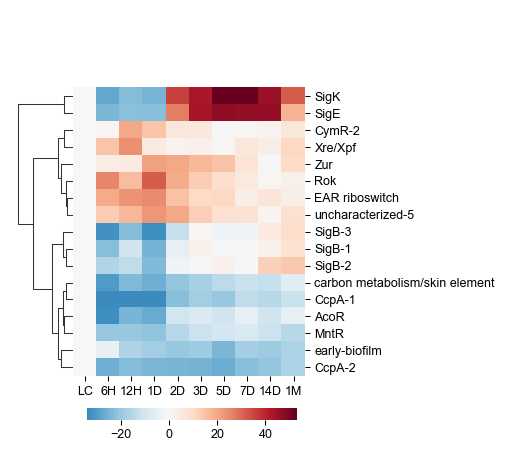

In [222]:
cg = sns.clustermap(avg_top_A,
               center=0,
               col_cluster=False,
               cmap='RdBu_r',
               figsize=(3.5,3),
               cbar_pos=(0.18,0.05,.4,.025),
               cbar_kws={'orientation':'horizontal'})
cg.ax_heatmap.set_xlabel('')
if save_plot:
    plt.savefig(path.join('raw_figures','Fig4_infer_activities.pdf'))